# Weather Classification
### Description
This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

### Variables
* Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
* Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
* Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
* Precipitation (%) (numeric): The precipitation percentage, including outlier values.
* Cloud Cover (categorical): The cloud cover description.
* Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
* UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
* Season (categorical): The season during which the data was recorded.
* Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
* Location (categorical): The type of location where the data was recorded.
* Weather Type (categorical): The target variable for classification, indicating the weather type.

### 1) Import Libraries and Data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### 2) Data Cleaning
* checking data types
* checking for missing values
* checking for outliers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


* appropriate data types

In [5]:
# checking for missing values
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

* there are no missing values

In [19]:
col = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type']
type(col)

list

In [23]:
# separating number columns and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_num = df[numerical_columns]
df_cat = df.drop(numerical_columns, axis=1)


,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy


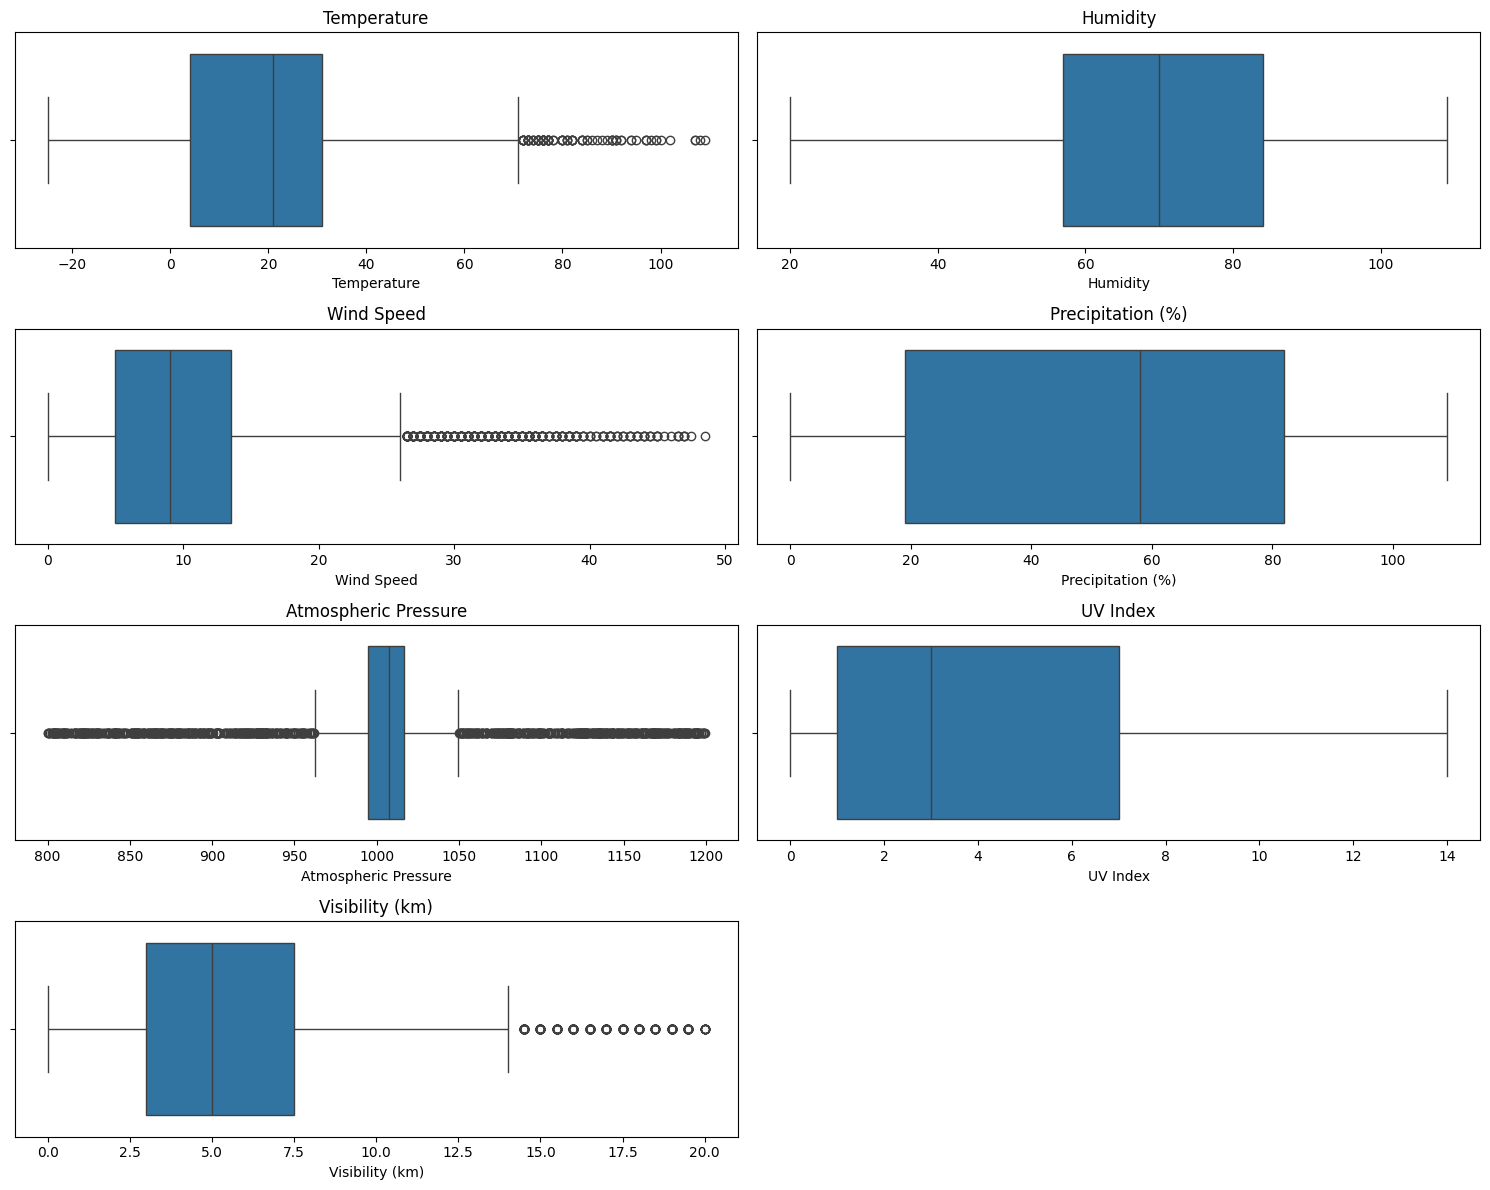

In [29]:
def plot_boxplots_grid(df, columns, figsize=(15, 12)):

    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_boxplots_grid(df, numerical_columns)

* there are outliers in the data that need to be removed from the dataframe

In [30]:
def remove_outliers(df, columns, k=1.5):

    df_clean = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers(df, numerical_columns)
df_clean.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [32]:
df_clean.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### 3) Data Exploration
* data measures of centrality 
* data distribution
* correlations
* balance of categorical data

In [33]:
# summary statistics
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,11689.0,19.093678,15.920637,-24.00,7.00,22.0,30.00,71.0
Humidity,11689.0,69.505005,19.415532,20.00,59.00,70.0,84.00,109.0
Wind Speed,11689.0,9.216956,5.615114,0.00,5.00,8.5,13.50,26.0
Precipitation (%),11689.0,52.006502,32.056549,0.00,18.00,56.0,81.00,109.0
Atmospheric Pressure,11689.0,1006.263816,12.937577,962.88,995.83,1007.9,1016.29,1049.2
UV Index,11689.0,3.613483,3.601013,0.00,1.00,2.0,6.00,14.0
Visibility (km),11689.0,5.106553,2.605640,0.00,3.00,5.0,7.50,14.0


C:\Users\hp\AppData\Local\Temp\ipykernel_25836\2499870121.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


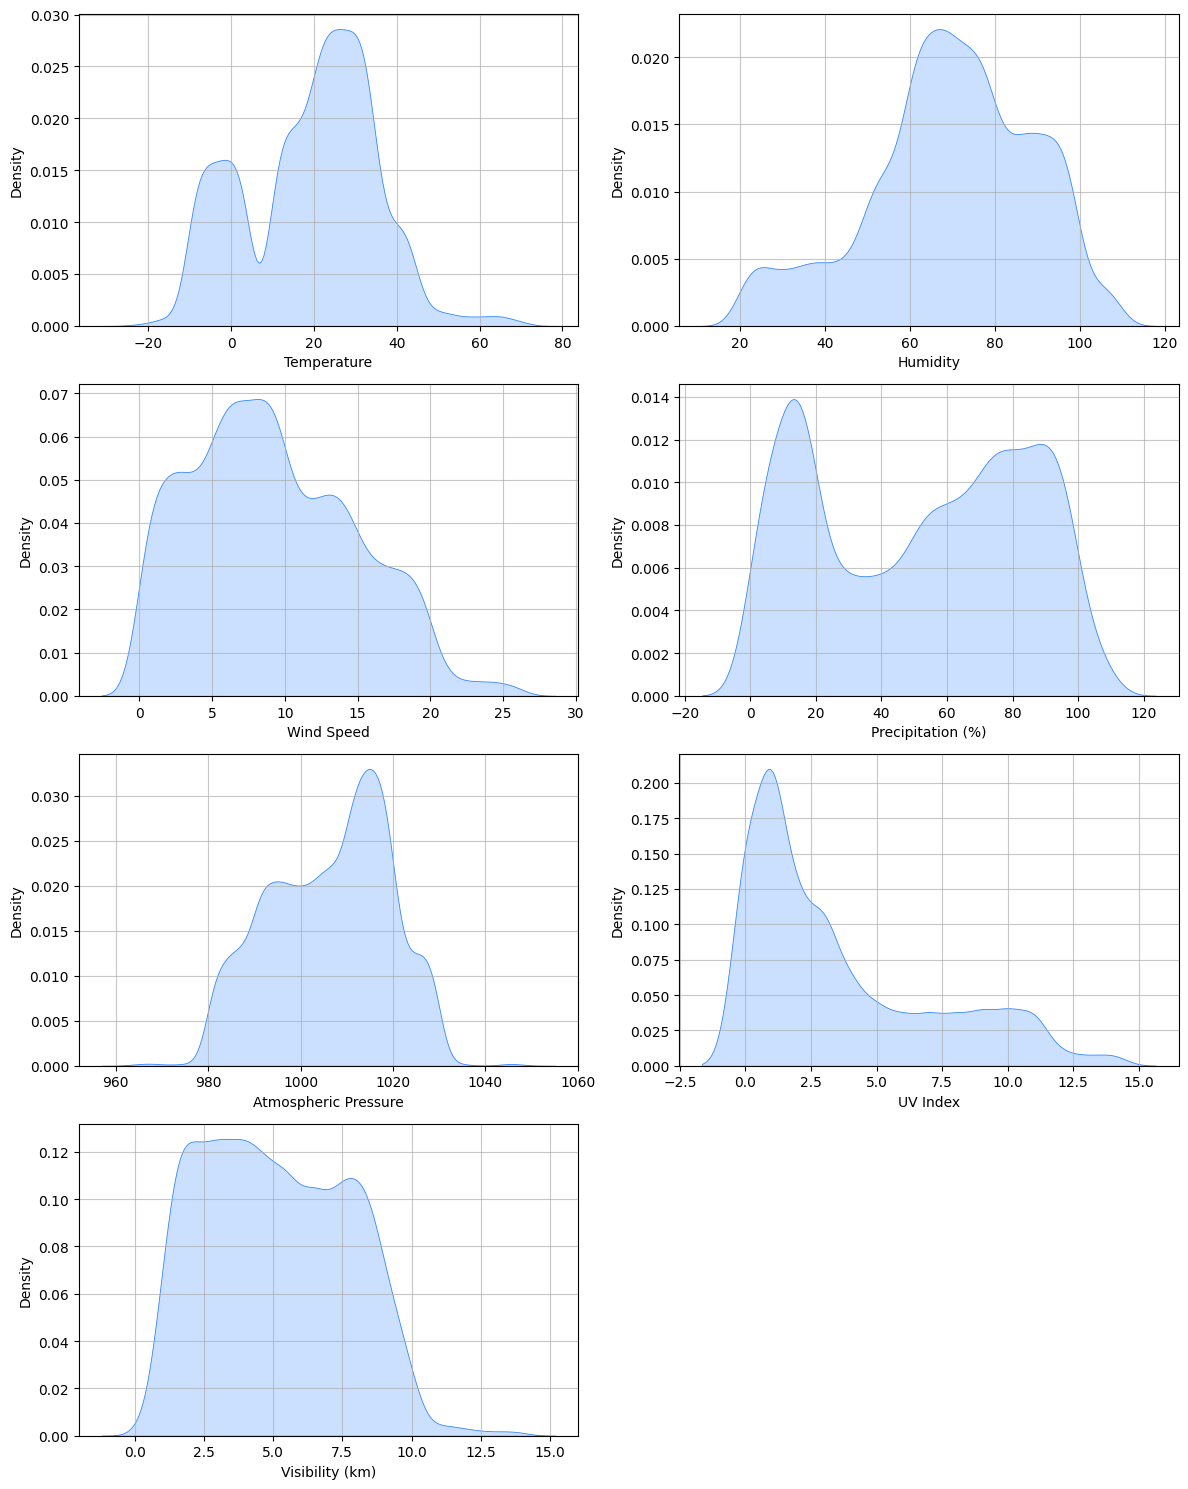

In [46]:
# looking at data distribution

fig = plt.figure(figsize=(12, 15))
rows, cols = 4, 2
for idx, num in enumerate(numerical_columns[:8]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis='both')
    sns.kdeplot(x=num, fill = True, color="#3386FF",linewidth=0.6, data = df_clean)
fig.tight_layout()
fig.show()

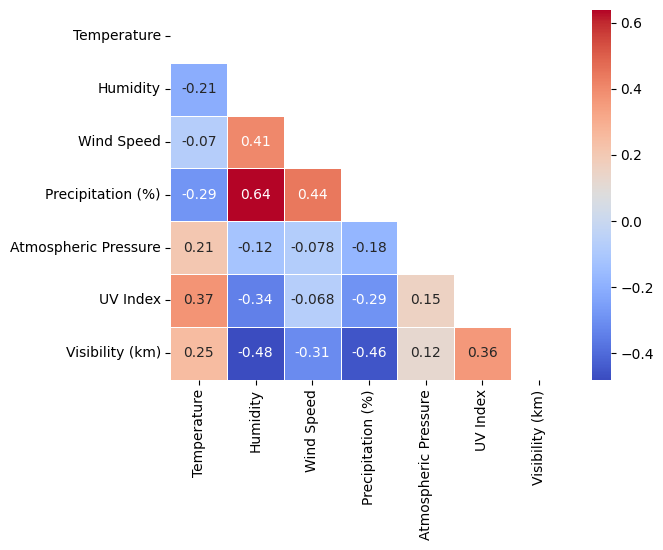

In [67]:
data_corr = df[numerical_columns].corr()
mask = np.triu(np.ones_like(data_corr, dtype=bool))
sns.heatmap(data_corr, mask=mask, annot=True ,cmap='coolwarm',linewidths=.6)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_25836\651367875.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


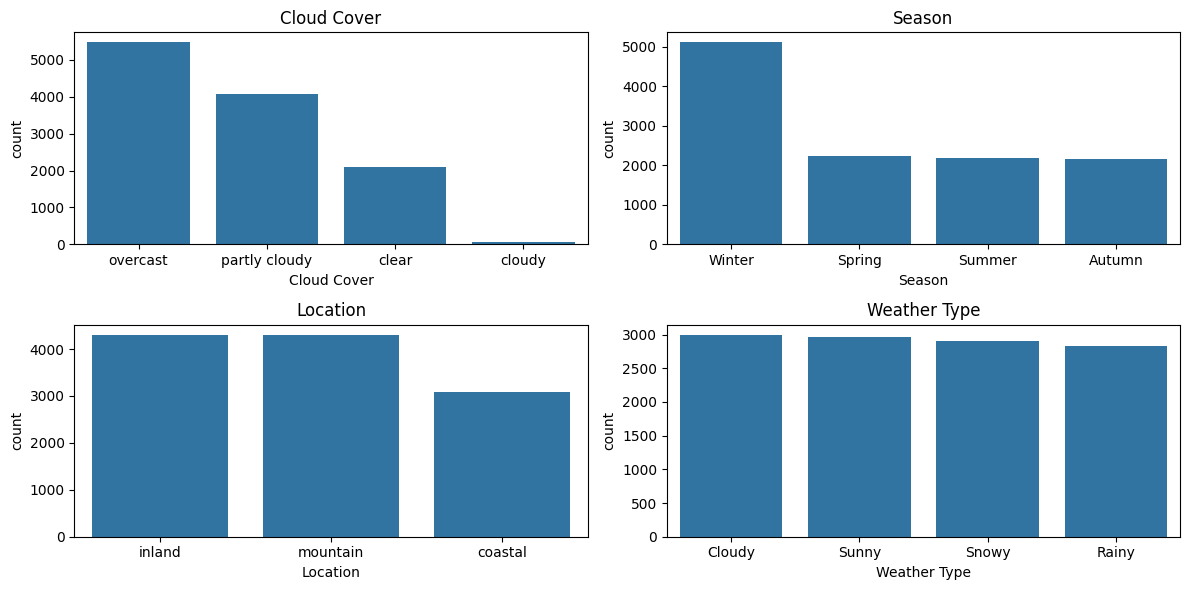

In [63]:
# checking categorical data balance
cat_cols = list(df_cat.columns)

fig = plt.figure(figsize=(12, 6))
rows = 2
cols = 2

for i, col in enumerate(cat_cols[:5]):
    ax = fig.add_subplot(rows, cols, i+1) 
    sns.barplot(df_clean[col].value_counts())
    plt.title(col)
fig.tight_layout()
fig.show()


## 4) Data Preprocessing
* encode data
* split data into training and test set
* scale data

In [108]:
data = df_clean.copy()
data["Weather Type"]=data["Weather Type"].map({"Rainy":0,"Cloudy":1,"Sunny":2, "Snowy":3})

In [109]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,1
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,2
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,2
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,0


In [120]:
X = data.drop('Weather Type', axis=1)
y = data['Weather Type']


In [121]:
# Encoding Data

X["Location"]=X["Location"].map({"coastal":1,"inland":2,"mountain":3})
X["Season"]=X["Season"].map({"Winter":1,"Spring":2,"Summer":3, "Autum":4})
X["Cloud Cover"]=X["Cloud Cover"].map({"partly cloudy":1,"clear":2,"overcast":3, "cloudy":4})

"""
X = pd.get_dummies(X, columns=["Location", "Season", "Cloud Cover"] )
for feature in X.columns:
    if X[feature].dtype=="bool":
        X[feature] = X[feature].astype(int)
"""
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,1,1010.82,2,1.0,3.5,2
1,39.0,96,8.5,71.0,1,1011.43,7,2.0,10.0,2
2,30.0,64,7.0,16.0,2,1018.72,5,2.0,5.5,3
3,38.0,83,1.5,82.0,2,1026.25,7,2.0,1.0,1
4,27.0,74,17.0,66.0,3,990.67,1,1.0,2.5,3


In [122]:
# splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## 5) Model Building
* use classification model

In [126]:
import xgboost

xgb_clc = xgboost.XGBClassifier()
xgb_clc.fit(X_train_sc, y_train)
xgb_clc.score(X_test_sc, y_test)

0.9739093242087254

## 6) Export Model

In [127]:
import pickle

pickle.dump(xgb_clc, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))